<a href="https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/notebooks/IntroLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression  
Linear regression is the simplest method of predicting continuous variables. Its all about establishing a relationship between dependent variable (*Y*) and one or more independent variables (*X*) using a best fit straight line (also known as regression line).

Mathematically,

$\begin {equation}
h(x_i) = y = m_i x_i + b
\end {equation}$

where $m_i$ is the linear coefficient (slope) and $b$ is the intercept.

### Why learn linear regression?

- Easy to use,
- Used everywhere,
- Runs quickly,
- interpretable,
- most basic form of machine learning.  




In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error as mse

## Objective:  Predict Sales Using Advertising Costs From Different Digital Platforms

### Read Data

In [0]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

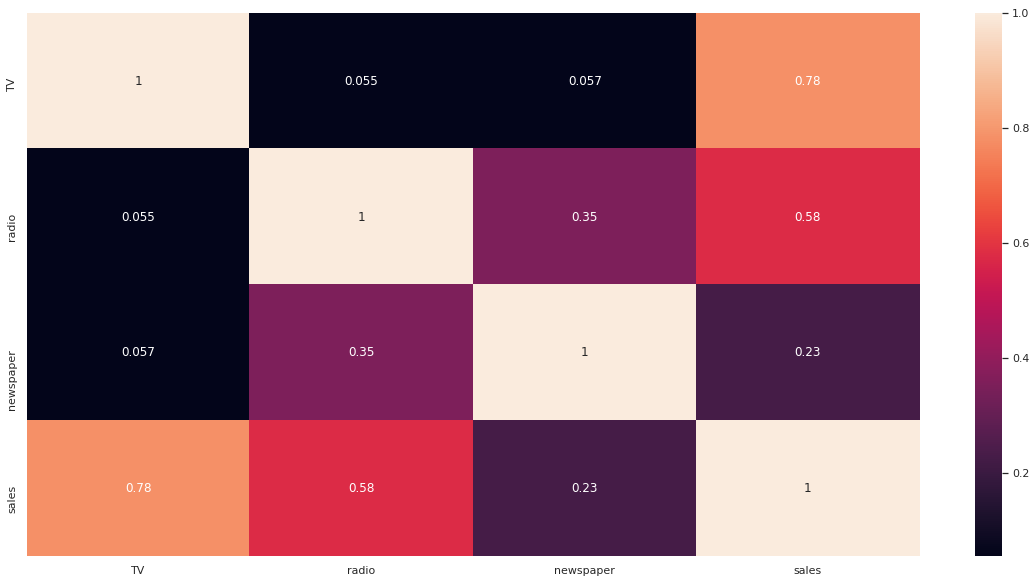

In [0]:
sns.heatmap(data.corr(), annot = True)

### Variables

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  
- **Radio**: advertising dollars spent on Radio  
- **Newspaper**: advertising dollars spent on Newspaper  

### Target  

- **Sales**: sales of a single product in a given market (in thousands of widgets)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


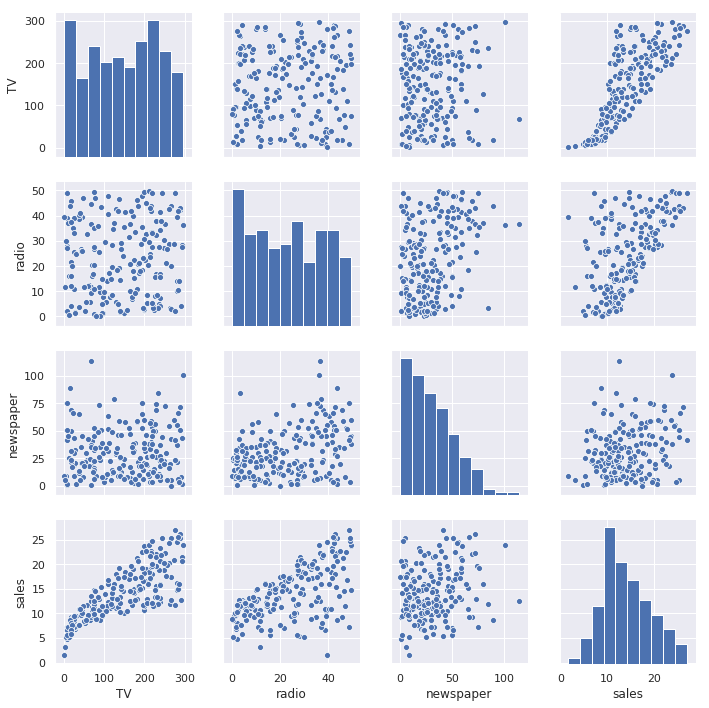

In [0]:
# Another (powerful) way of displaying correlation and distribution through scatter plots
sns.pairplot(data, size=2.5)

# Linear Regression  
Linear Regression using Sklearn

The usual methodology for fitting datasets using sklearn is:  
1. Import package, 
2. Set Variables (X) and Target (y), 
3. Split the dataset to train-test.
4. Initialize model,
5. Fit X and y to model,
6. Extract coefficients (and intercept),
7. Get model metric (in our case, R-squared).

### For now, we use all three variables to predict sales  


In [0]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [0]:
# Define Features
features = ['TV', 'radio', 'newspaper']

# Set X
X = data[features]

In [0]:
# Set y
y = data['sales']

In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [0]:
# Initialize model
model = LinearRegression() 


In [0]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [0]:
# print coefficient
coefficient

array([0.04491068, 0.19843664, 0.0085429 ])

In [0]:
# print intercept
intercept

2.5825935725675553

In [0]:
# calculate the R-squared
model.score(X, y)

0.8938649157644929

In [0]:
y_predicted = model.predict(X_test)

The equation of the line is just: 

$\begin {equation}
Sales = 0.045 * TV + 0.198 * Radio + 0.008 * newspaper + 2.58
\end {equation}$

### Interpreting the Coefficients
- For a given amount of Radio and Newspaper ad spending, an **increase of 1000 dollars in TV ad spending** is associated with an **increase in Sales of 45 widgets** (assuming everything else is unchanged).

- For a given amount of TV and Newspaper ad spending, an **increase of 1000 dollars in Radio ad spending** is associated with an **increase in Sales of 198 widgets** (assuming everything else is unchanged).
- For a given amount of TV and Radio ad spending, a **increase of 1000 dollars in newspaper ad spending** is associated with an **increase in Sales of 8 widget**.

In [0]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd


,Features,Coefficients
0,TV,44.910676
1,radio,198.436642
2,newspaper,8.542896


### Contribution Chart

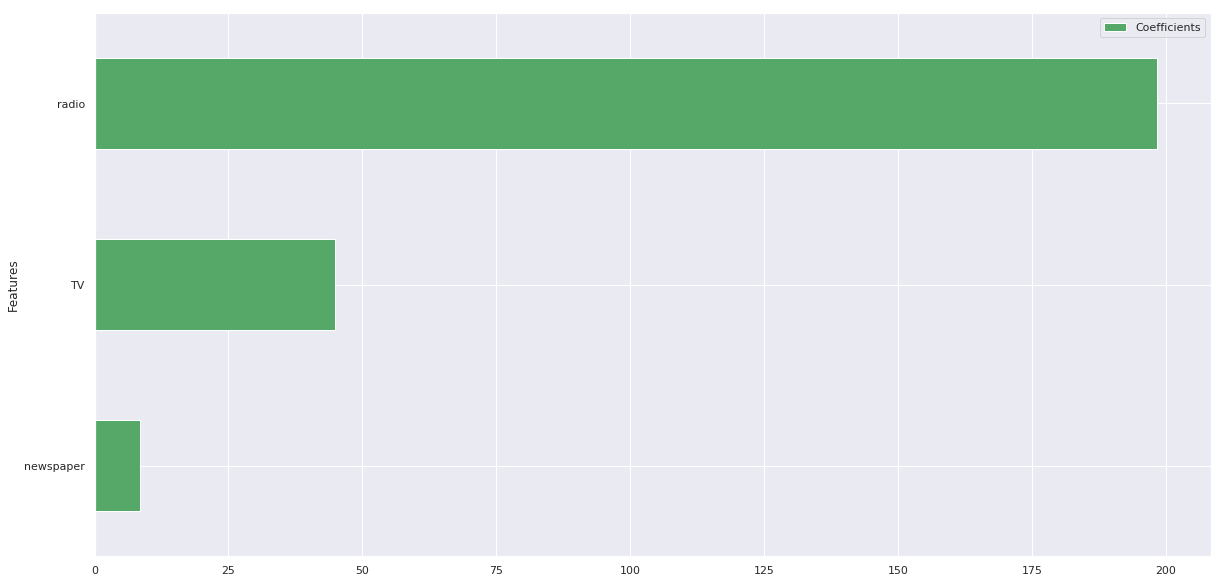

In [0]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

### Actual Prediction of Sales Using New Advertising Data

In [0]:
# We input new advertising data into the model to predict future sales

# Sample TV, Radio, Newspaper
new_data = [[10, 30, 100]]
model.predict(new_data)

array([9.83908922])

We can change the three values in `new_data` to see how much sales we can generate based on ad cost.

### Model Error

In [0]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

1.8517576731904284

This means that the root mean square error of any prediction done by the model against the actual value should be ~2 widgets per campaign. Your predictions should deviate from the real values only by about 2 widgets.